In [1]:
# GLM & Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # The default processing plot platform for python
import statsmodels.api as sm      # Scipy or sklearn or statmodels.api
import statsmodels.formula.api as smf # A way to do forward and backward selections
import seaborn as sn  # A fancier way to plot things with nice animations and color patterns

In [2]:
Data = pd.DataFrame() # Declare a panda

Data['Fall'] = [1,1,0,1,1,0,0,1,1,1,0,0,1,1,0]
Data['Difficulty'] = [3,1,1,2,3,2,1,3,2,2,2,2,3,2,3]
Data['Season'] = [1,1,3,3,2,2,2,1,3,1,2,3,2,2,1]
Data['Season'] = Data['Season'].astype('category')
Data['intercept'] = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

print(Data.dtypes)
Data

Fall             int64
Difficulty       int64
Season        category
intercept        int64
dtype: object


,Fall,Difficulty,Season,intercept
0,1,3,1,1
1,1,1,1,1
2,0,1,3,1
3,1,2,3,1
4,1,3,2,1
5,0,2,2,1
6,0,1,2,1
7,1,3,1,1
8,1,2,3,1
9,1,2,1,1


In [3]:
# Option 1
Data = pd.DataFrame() # Declare a panda

Data['Fall'] = [1,1,0,1,1,0,0,1,1,1,0,0,1,1,0]
Data['Difficulty'] = [3,1,1,2,3,2,1,3,2,2,2,2,3,2,3]
Data['Season'] = [1,1,3,3,2,2,2,1,3,1,2,3,2,2,1]
Data['Season'] = Data['Season'].astype('category')
Data = pd.concat((Data,pd.get_dummies(Data['Season'], drop_first=True)), axis=1) # Drop the baseline, already included in the intercept
Data['intercept'] = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

print(Data.dtypes)
Data

Fall             int64
Difficulty       int64
Season        category
2                uint8
3                uint8
intercept        int64
dtype: object


,Fall,Difficulty,Season,2,3,intercept
0,1,3,1,0,0,1
1,1,1,1,0,0,1
2,0,1,3,0,1,1
3,1,2,3,0,1,1
4,1,3,2,1,0,1
5,0,2,2,1,0,1
6,0,1,2,1,0,1
7,1,3,1,0,0,1
8,1,2,3,0,1,1
9,1,2,1,0,0,1


In [4]:
# Construct a logistic regression model
X = Data[['intercept','Difficulty',2,3]]
Y = Data['Fall']
logistic_model = sm.GLM(Y, X, family=sm.families.Binomial())
logistic_model = logistic_model.fit()

logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Fall   No. Observations:                   15
Model:                            GLM   Df Residuals:                       11
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.7404
Date:                Wed, 06 Oct 2021   Deviance:                       17.481
Time:                        14:27:13   Pearson chi2:                     17.6
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8493      2.179     -0.390      0.697      -5.121       3.422
Difficulty     1.0108      0.896      1.128      0.259      -0.745       2.767
2             -1.3460      1.478     -0.911      0.362      -4.243       1.551
3             -0.9275      1.589     -0.584      0.560      -4.043       2.188
==============================================================================
"""

In [5]:
print(logistic_model.params)               # Coefficients
coeffs = logistic_model.params.values      # Coefficients as an array for np.dot

X_tst = [1,3,0,0]                          # Values to test
y_pred = np.dot(X_tst,coeffs)              # Logit(p) = X*beta
print(y_pred)

p_pred = 1/(1+np.exp(-y_pred))             # Probability of Y = 1
p_pred


intercept    -0.849313
Difficulty    1.010798
2            -1.345984
3            -0.927518
dtype: float64
2.1830796283287164


0.8987197322064785

In [6]:
X_tst = X                                  # Values to test
y_pred = np.dot(X_tst,coeffs)              # Logit(p) = X*beta
print(y_pred)

p_pred = 1/(1+np.exp(-y_pred))             # Probability of Y = 1
p_pred

# Individual Log-likelihood calculation
print('\n\n Individualized Log-likelihood')
Y*np.log(p_pred) + (1-Y)*np.log(1-p_pred)

[ 2.18307963  0.16148426 -0.76603337  0.24476431  0.83709528 -0.17370241
 -1.18450009  2.18307963  0.24476431  1.17228194 -0.17370241  0.24476431
  0.83709528 -0.17370241  2.18307963]


 Individualized Log-likelihood


0    -0.106784
1    -0.615661
2    -0.381755
3    -0.578235
4    -0.359747
5    -0.610063
6    -0.266892
7    -0.106784
8    -0.578235
9    -0.269767
10   -0.610063
11   -0.822999
12   -0.359747
13   -0.783765
14   -2.289864
Name: Fall, dtype: float64

In [7]:
# Sum of the log-likelihoods
print('\nLog-likelihood = Sum of individualized log-likelihoods')
np.sum(Y*np.log(p_pred) + (1-Y)*np.log(1-p_pred))


Log-likelihood = Sum of individualized log-likelihoods


-8.740360755197806

Text(0, 0.5, 'Probability = p_pred = 1/(1+exp(-X*beta))')

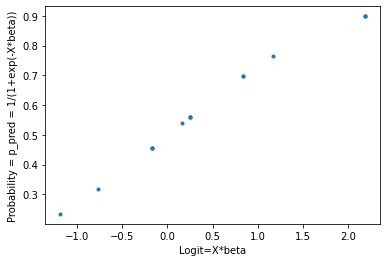

In [8]:
# Making sense of how good is the logistic regression performing
plt.plot(y_pred,p_pred,'.')
plt.xlabel('Logit=X*beta')
plt.ylabel('Probability = p_pred = 1/(1+exp(-X*beta))')

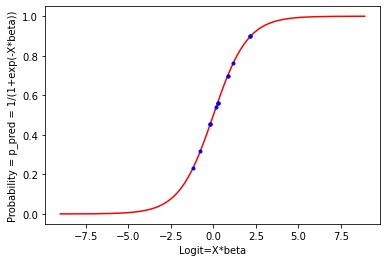

In [9]:
# Making sense of how good is the logistic regression performing
# Plot the classifier
Y_spread = np.arange(-9,9,0.1)
plt.plot(Y_spread,1/(1+np.exp(-Y_spread)),'r',y_pred,p_pred,'b.')
plt.xlabel('Logit=X*beta')
plt.ylabel('Probability = p_pred = 1/(1+exp(-X*beta))');

# The training classifications are in the poor region of the classifier, indiciating that the model is not reliable

In [10]:
# Another test is the G-statistic test
# Null model likelihood
n = len(Y)
n_pos = np.sum(Y)

p_pos_null = np.ones(n)*n_pos/n

print(p_pos_null)

# Individual Log-likelihood calculation
print('\n\n Null model: Individualized Log-likelihood')
Y*np.log(p_pos_null) + (1-Y)*np.log(1-p_pos_null)

[0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]


 Null model: Individualized Log-likelihood


0    -0.510826
1    -0.510826
2    -0.916291
3    -0.510826
4    -0.510826
5    -0.916291
6    -0.916291
7    -0.510826
8    -0.510826
9    -0.510826
10   -0.916291
11   -0.916291
12   -0.510826
13   -0.510826
14   -0.916291
Name: Fall, dtype: float64

In [11]:
# Sum of the log-likelihoods
print('\nLog-likelihood = Sum of individualized log-likelihoods')
print(np.sum(Y*np.log(p_null) + (1-Y)*np.log(1-p_null)))


G = 2*np.sum(Y*np.log(p_pred) + (1-Y)*np.log(1-p_pred))-2*np.sum(Y*np.log(p_null) + (1-Y)*np.log(1-p_null))
print('\nG-value =', G)

from scipy.stats import chi2
p_value = chi2.sf(G, df=np.shape(X)[1]-1)

print('\np_value = ' , p_value)

print('G from Chi2 Distribution = ', chi2.ppf(0.95,df=3))


Log-likelihood = Sum of individualized log-likelihoods


NameError: name 'p_null' is not defined